In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv('Manaus.csv', sep=';', encoding='latin-1')

#Limpeza
cleaned_data = df[['_idade','_sexo','_bairro','_classificacao','_conclusao','_dt_notificacao','_teste_pcr','_teste_anticorpo','_teste_antigeno','_teste_igm','_teste_igg','_faixa etária']]
cleaned_data = cleaned_data.dropna()
cleaned_data = cleaned_data.reset_index(drop=True)
df = cleaned_data

c:\users\luiz fabio\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15,21,23,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
df.head()

,_idade,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_teste_pcr,_teste_anticorpo,_teste_antigeno,_teste_igm,_teste_igg,_faixa etária
0,43.0,F,SANTA ETELVINA,Em análise,Recuperado,08/04/2020,0.0,0.0,0.0,0.0,0.0,40a - 49a
1,39.0,M,CRESPO,Em análise,Recuperado,31/03/2020,0.0,0.0,0.0,0.0,0.0,30a - 39a
2,42.0,F,JAPIIM 1,Em análise,Recuperado,07/04/2020,0.0,0.0,0.0,0.0,0.0,40a - 49a
3,35.0,F,JORGE TEIXEIRA,Em análise,Recuperado,04/05/2020,0.0,0.0,0.0,0.0,0.0,30a - 39a
4,45.0,F,COROADO,Em análise,Recuperado,04/05/2020,0.0,0.0,0.0,0.0,0.0,40a - 49a


In [29]:
casos_confirmados = df.loc[df['_classificacao'] == 'Confirmado']

In [30]:
casos_confirmados_dt_notificao = casos_confirmados.filter(items=['_dt_notificacao'])

In [31]:
casos_confirmados_dt_notificao = casos_confirmados_dt_notificao['_dt_notificacao'].value_counts()
casos_confirmados_dt_notificao

12/05/2020    271
27/05/2020    240
21/05/2020    238
20/05/2020    224
22/05/2020    218
             ... 
18/03/2020      1
17/07/2020      1
28/07/2020      1
11/03/2020      1
09/08/2020      1
Name: _dt_notificacao, Length: 136, dtype: int64

In [32]:
list_of_tuples = list(zip(casos_confirmados_dt_notificao.index, casos_confirmados_dt_notificao.values))  
datas_casos = pd.DataFrame(list_of_tuples, columns = ['Datas', 'Casos'])
n = datas_casos['Datas'].size

display(datas_casos)

,Datas,Casos
0,12/05/2020,271
1,27/05/2020,240
2,21/05/2020,238
3,20/05/2020,224
4,22/05/2020,218
...,...,...
131,18/03/2020,1
132,17/07/2020,1
133,28/07/2020,1
134,11/03/2020,1


In [33]:
switcher = {
    '01': "January",
    '02': "February",
    '03': "March",
    '04': "April",
    '05': "May",
    '06': "June",
    '07': "July",
    '08': "August",
    '09': "September",
    '10': "October",
    '11': "November",
    '12': "December"
}

for i in range (n):
    codigo_mes = datas_casos['Datas'][i][3:5]
    nome_mes = switcher.get(codigo_mes)
    datas_casos['Datas'][i] = nome_mes

display(datas_casos)

<ipython-input-33-c906ff052421>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_casos['Datas'][i] = nome_mes


,Datas,Casos
0,May,271
1,May,240
2,May,238
3,May,224
4,May,218
...,...,...
131,March,1
132,July,1
133,July,1
134,March,1


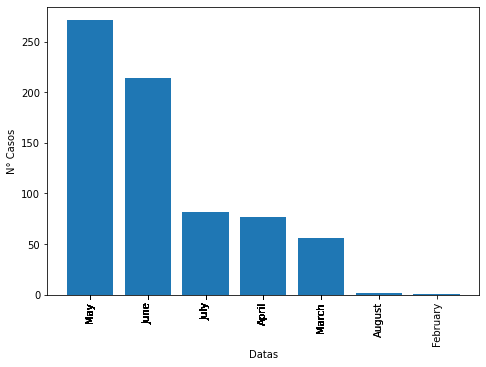

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(datas_casos['Datas'], datas_casos['Casos'])
ax.set_xlabel('Datas')
ax.set_ylabel('N° Casos')
plt.xticks(datas_casos['Datas'],rotation=90)
plt.show()